In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# added some pandas options to be able to see all the columns
pd.set_option("display.max_columns",30)
pd.set_option("display.max_rows",50)

In [2]:
df  = pd.read_csv("hotels.csv")

In [3]:
df.head()

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating
0,Austria,Vienna,36.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,4.5,216.0,1,21894,1,15-50% offer,2017,11,0,0,2.7,4.4,Apartment,1,4.4
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,708.0,0,21897,1,1-15% offer,2017,11,0,0,1.7,3.8,Hotel,1,3.9
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,629.0,0,21901,1,15-50% offer,2017,11,0,0,1.4,2.5,Hotel,1,3.7
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,52.0,0,21902,1,15-50% offer,2017,11,0,0,1.7,2.5,Hotel,1,4.0
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,219.0,1,21903,1,15-50% offer,2017,11,0,0,1.2,2.8,Hotel,1,3.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             428 non-null    object 
 1   city_actual         428 non-null    object 
 2   rating_count        393 non-null    float64
 3   center1label        428 non-null    object 
 4   center2label        428 non-null    object 
 5   neighbourhood       428 non-null    object 
 6   price               428 non-null    int64  
 7   city                428 non-null    object 
 8   stars               428 non-null    float64
 9   ratingta            325 non-null    float64
 10  ratingta_count      325 non-null    float64
 11  scarce_room         428 non-null    int64  
 12  hotel_id            428 non-null    int64  
 13  offer               428 non-null    int64  
 14  offer_cat           428 non-null    object 
 15  year                428 non-null    int64  
 16  month   

In [5]:
# to find null values in all the columnns
df.isna().sum()

country                 0
city_actual             0
rating_count           35
center1label            0
center2label            0
neighbourhood           0
price                   0
city                    0
stars                   0
ratingta              103
ratingta_count        103
scarce_room             0
hotel_id                0
offer                   0
offer_cat               0
year                    0
month                   0
weekend                 0
holiday                 0
distance                0
distance_alter          0
accommodation_type      0
nnights                 0
rating                 35
dtype: int64

In [6]:
# to identify the cities pressent in the dataset
df["city"].unique()

array(['Vienna'], dtype=object)

In [7]:
# to identify the neighbourhoods pressent in the dataset
df["neighbourhood"].unique()

array(['17. Hernals', 'Alsergrund', 'Donaustadt', 'Favoriten',
       'Fischamend', 'Graben', 'Innere Stadt', 'Josefstadt',
       'Kaerntner Strasse', 'Landstrasse', 'Leopoldstadt', 'Margareten',
       'Mariahilf', 'Neubau', 'Ottakring', 'Rudolfsheim-Funfhaus',
       'Schonbrunn', 'Schwechat', 'Vienna', 'Voesendorf', 'Wahring',
       'Wieden'], dtype=object)

In [8]:
# to identify occurence of the neighbourhood pressent in the dataset
df["neighbourhood"].value_counts()

neighbourhood
Innere Stadt            84
Vienna                  43
Leopoldstadt            41
Landstrasse             32
Josefstadt              26
Mariahilf               25
Wieden                  22
Favoriten               22
Rudolfsheim-Funfhaus    21
Neubau                  21
Alsergrund              17
Margareten              16
Schonbrunn              14
Kaerntner Strasse       10
Donaustadt               9
Schwechat                7
Ottakring                5
Wahring                  5
Graben                   3
Voesendorf               2
17. Hernals              2
Fischamend               1
Name: count, dtype: int64

In [9]:
# descriptive statisitcs on the price
df[["price","distance"]].describe()

,price,distance
count,428.000000,428.000000
mean,131.366822,1.658879
std,91.580545,1.595673
min,27.000000,0.000000
25%,83.000000,0.700000
50%,109.500000,1.300000
75%,146.000000,2.000000
max,1012.000000,13.000000


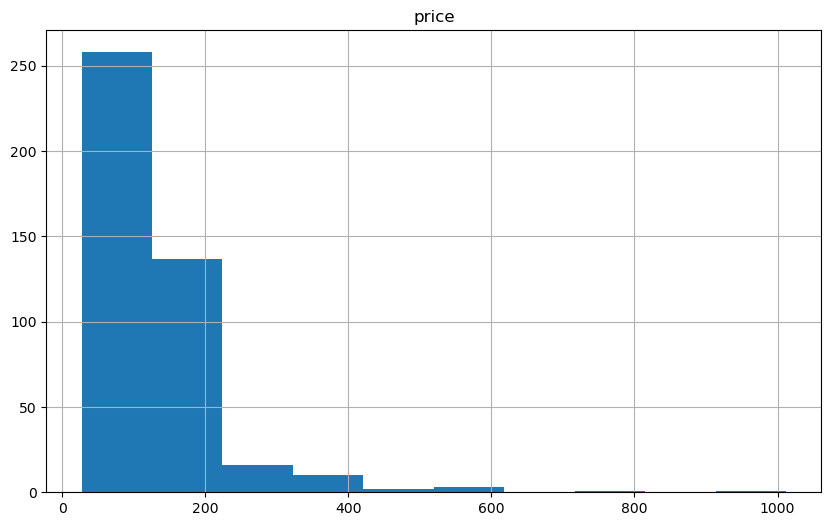

In [10]:
df[["price"]].hist(figsize=(10,6)) 
plt.show()
# skewed to the right -- mean >> median

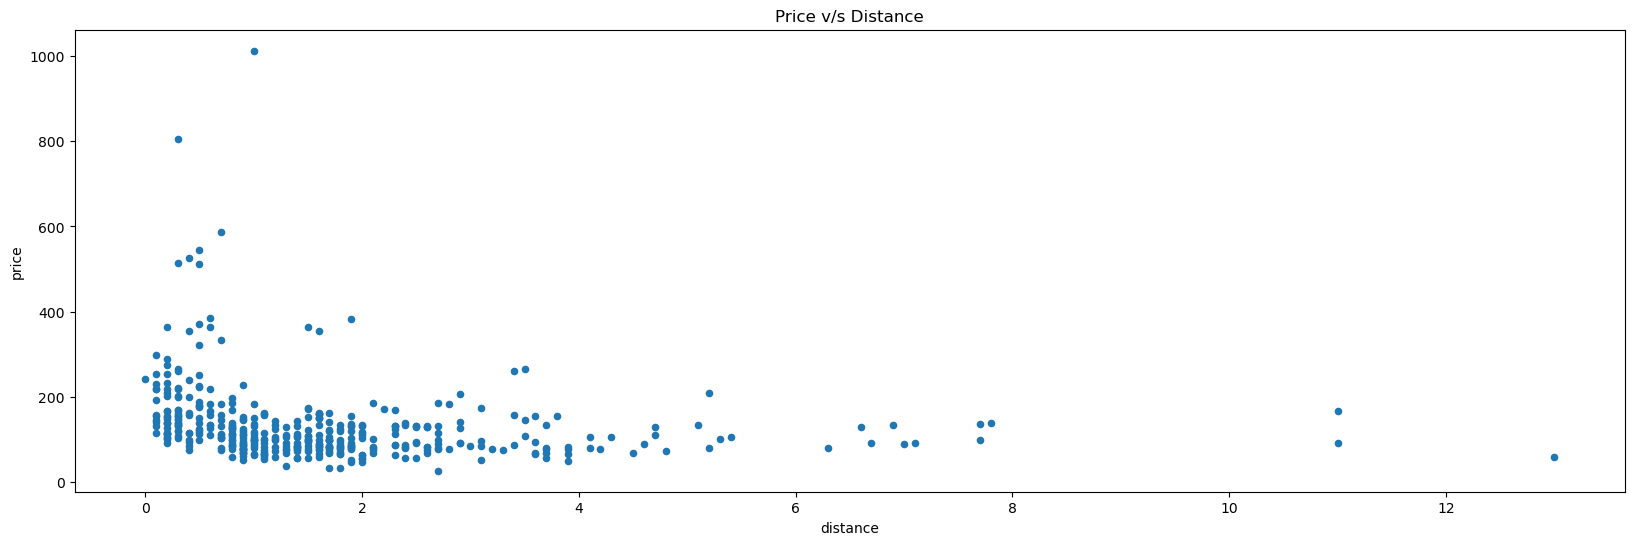

In [11]:
# Relation between Price and Distance
df[["price","distance"]].plot.scatter(x="distance",y="price",figsize=(20,6),title="Price v/s Distance")
plt.show()

#### What are the most expensive hotels in the city of vienna ?

In [12]:
df[df["price"]>700]

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating
61,Austria,Vienna,5.0,City centre,Donauturm,Innere Stadt,806,Vienna,5.0,4.5,114.0,0,21976,1,15-50% offer,2017,11,0,0,0.3,2.8,Hotel,1,4.5
300,Austria,Vienna,77.0,City centre,Donauturm,Neubau,1012,Vienna,3.0,4.0,364.0,1,22252,1,1-15% offer,2017,11,0,0,1.0,3.8,Hotel,1,4.3


##### as we observed from the charts the expensive hotels are very near and are in less distance particularly in the range of 0km to 1km

#### What are the average price per neighbourhood ?

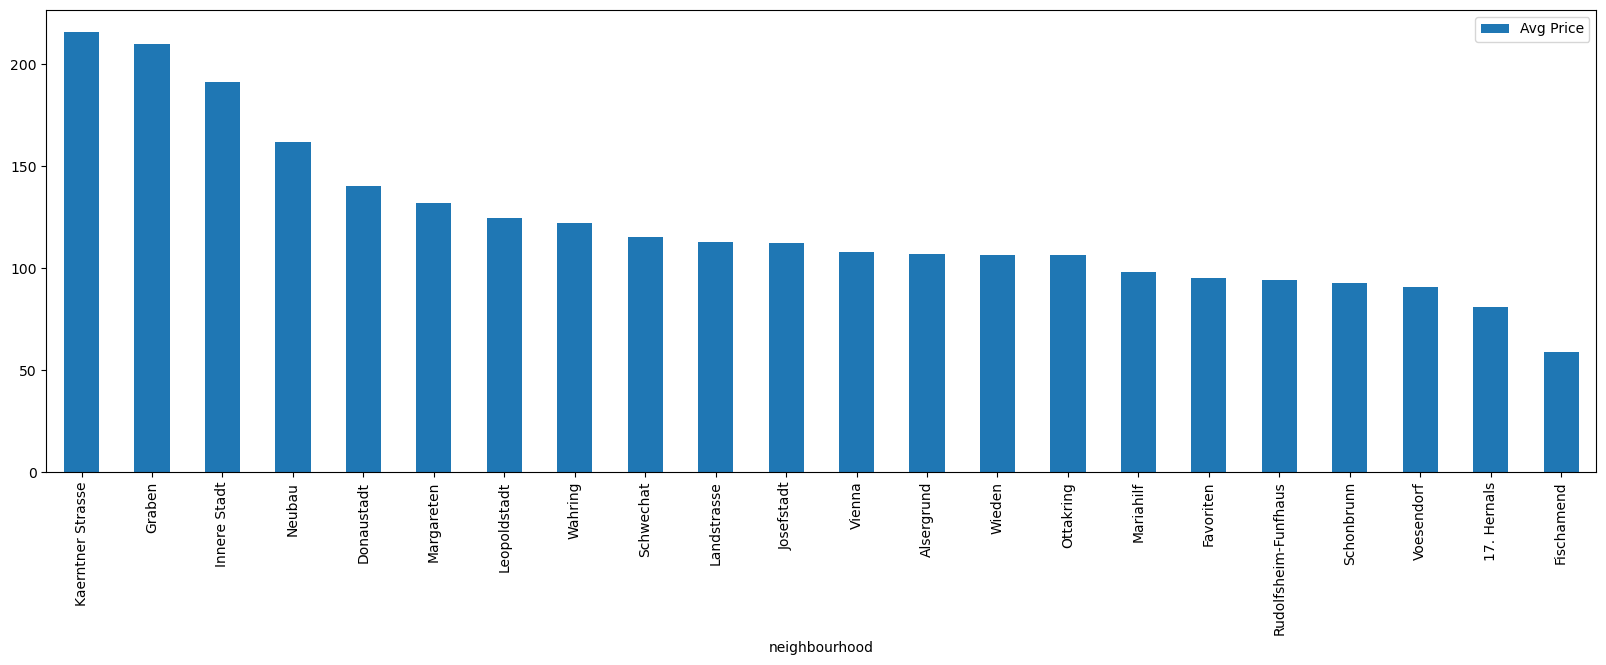

In [13]:
df[["price","neighbourhood"]].groupby("neighbourhood").mean().rename(columns={"price":"Avg Price"}).sort_values("Avg Price",ascending=False).plot(kind="bar",figsize=(20,6))
plt.show()

#### Regression Analysis

##### 1. Non Paramterised 
##### -- based on distance categories
##### -- CLOSE and FAR Hotels
##### -- "distance: <=3 CLOSE , otherwise FAR

In [14]:
# created a new field and populate it with None
df.loc[:,"category"] = [None for i in range(len(df)) ]

In [15]:
df.head(2)

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating,category
0,Austria,Vienna,36.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,4.5,216.0,1,21894,1,15-50% offer,2017,11,0,0,2.7,4.4,Apartment,1,4.4,None
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,708.0,0,21897,1,1-15% offer,2017,11,0,0,1.7,3.8,Hotel,1,3.9,None


We are trying to find the indices of the hotels which are far from the city centre or close to the centre and make a new column category whci will categorise all the entries in our dataset according to their distance from the city centre

In [16]:
close_hotels = (df["distance"] <= 3)
far_hotels = (df["distance"] > 3)

In [17]:
far_by_index = df[far_hotels].index
far_by_index

Index([ 19,  20,  21,  22,  23,  24,  25,  27,  50, 311, 313, 324, 335, 339,
       340, 343, 344, 349, 350, 351, 352, 353, 354, 355, 356, 358, 360, 361,
       362, 364, 365, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 382,
       383, 384, 385, 388, 390, 392, 395, 396, 399, 400],
      dtype='int64')

In [18]:
close_by_index = df[close_hotels].index
close_by_index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       418, 419, 420, 421, 422, 423, 424, 425, 426, 427],
      dtype='int64', length=376)

we are going to use the indice to populate the category column

In [19]:
df.loc[far_by_index,"category"]=["FAR" for i in range(len(far_by_index))]
df.loc[close_by_index,"category"]=["CLOSE" for i in range(len(close_by_index))]

In [20]:
df.head()

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating,category
0,Austria,Vienna,36.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,4.5,216.0,1,21894,1,15-50% offer,2017,11,0,0,2.7,4.4,Apartment,1,4.4,CLOSE
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,708.0,0,21897,1,1-15% offer,2017,11,0,0,1.7,3.8,Hotel,1,3.9,CLOSE
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,629.0,0,21901,1,15-50% offer,2017,11,0,0,1.4,2.5,Hotel,1,3.7,CLOSE
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,52.0,0,21902,1,15-50% offer,2017,11,0,0,1.7,2.5,Hotel,1,4.0,CLOSE
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,219.0,1,21903,1,15-50% offer,2017,11,0,0,1.2,2.8,Hotel,1,3.9,CLOSE


In [21]:
df["category"].value_counts()

category
CLOSE    376
FAR       52
Name: count, dtype: int64

##### Non Paramterised Regression

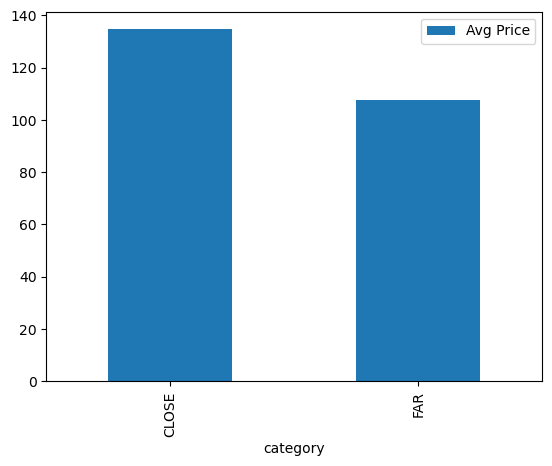

In [22]:
df[["price","category"]].groupby("category").mean().rename(columns={"price":"Avg Price"}).plot(kind="bar")
plt.show()

#### Paramterised Regression